# Part I - (Loan Data from Prosper)
## by Joshua Olayori

## Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This project is part of the requirements for the Udacity Data Analyst Degree Certification.
 



## Preliminary Wrangling


In [1]:
#importing all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#loading in the dataset
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield    ...     LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380    ...            -133.18                0.0   
1        0.0920       0.0820    ...               0.00                0.0   
2        0.2750       0.2400    ...             -24.20                0.0   
3        0.0974       0.0874    ...            -108.01                0.0   
4        0.2085       0.1985    ...             -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [3]:
loan_data

ListingKey  ListingNumber            ListingCreationDate  \
0       1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2       0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5       0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6       0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7       0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8       0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9       0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
10      0F123545674891886D9F106         587746  2012-05-10 07:04:01.577000000   
11      0F1734025150298088A5F2B         213551  2007-10-09 20:28:33.640000000   
12      0F1A3597143888805163EF7        1081604  2013-12-15 20:01:10.757000000   
13      0F1C3583260311305D68F87         840820  2013-07-15 16:28:28.087000000   
14      0F353575943675863D1AFC0         757359  2013-04-19 11:17:41.700000000   
15      0F483544120452347F48121         577164  2012-04-10 09:14:46.297000000   
16      0F4835843081468212F0892         841846  2013-07-16 12:42:48.680000000   
17      0FDF336575182398852A8DC          31540  2006-08-15 12:21:09.433000000   
18      0FF2357105361877390B58D         716058  2013-02-20 03:48:37.470000000   
19      0FFC35866018516621B0D3F         875565  2013-08-21 06:49:02.093000000   
20      101635959323992333B3C70        1011916  2013-11-22 11:35:02.987000000   
21      1017340630713945364DA6B         241498  2007-11-30 20:33:49.227000000   
22      101735700321773921526BF         706927  2013-01-30 09:36:13.783000000   
23      101B35764008108187B2EBA         758964  2013-04-22 13:29:19.073000000   
24      101B3596709094692AC79C0        1046345  2013-12-03 11:34:46.127000000   
25      10223590888942486E3826E         950067  2013-10-02 14:31:09.157000000   
26      0F4F3571508214190FD75CB         713131  2013-02-12 18:07:31.690000000   
27      0F5034867864161084F3789         463083  2010-06-16 16:23:44.533000000   
28      0F53359346357513247D86B         989519  2013-11-02 16:01:28.050000000   
29      0F563597161095613517437        1051243  2013-12-17 09:18:33.220000000   
...                         ...            ...                            ...   
113907  C982359388882926442DE72        1005215  2013-11-09 06:55:05.690000000   
113908  C9843500054876019D611A1         486057  2010-11-29 10:40:09.730000000   
113909  C98635564651525938EB38E         635880  2012-09-08 10:34:38.837000000   
113910  C9873600264828351437CAB        1161059  2014-01-24 19:56:49.960000000   
113911  C9883594035073098BC5D51         996496  2013-11-15 11:42:47.540000000   
113912  C98A3597264633447D66DF9        1083677  2013-12-16 16:36:00.990000000   
113913  D2013482695428940FAD9E3         455673  2010-04-25 15:13:27.963000000   
113914  D20533652658825353F6597          30223  2006-08-09 14:34:40.010000000   
113915  D2053427325575423785798         374730  2008-07-29 05:22:29.390000000   
113916  D2063562664602024E13D82         667047  2012-11-08 20:07:36.600000000   
113917  D2063594229009539839457        1028126  2013-11-23 04:52:50.057000000   
113918  D207342464194217591D1E1         353488  2008-06-19 12:02:53.300000000   
113919  D20C3577637248543A1F80C         772509  2013-05-07 18:49:59.750000000   
113920  D20E358076984586576526D         804763  2013-06-11 05:49:40.247000000   
113921  D21A33647075665665BE266              4  2005-11-09 20:44:28.847000000   
113922  D2293427338962159DA5143         379986  2008-08-08 16:58:54.760000000   
113923  E334343080922352965DF86         395877  2008-09-10 08:26:30.537000000   
113924  E340356181565702714DBCE         657862  2012

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
#dropping null values in needed columns
loan_data = loan_data.dropna(subset = ['DebtToIncomeRatio', 'EmploymentStatus', 'Occupation',
                                      'BorrowerAPR'], how = 'any')

In [6]:
#changing 'LoanStatus' data type to category
loan_data['LoanStatus'] = loan_data.LoanStatus.astype('category')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
#changing 'EmploymentStatus' data type to category
loan_data['EmploymentStatus'] = loan_data.EmploymentStatus.astype('category')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101824 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             101824 non-null object
ListingNumber                          101824 non-null int64
ListingCreationDate                    101824 non-null object
CreditGrade                            25480 non-null object
Term                                   101824 non-null int64
LoanStatus                             101824 non-null category
ClosedDate                             48620 non-null object
BorrowerAPR                            101824 non-null float64
BorrowerRate                           101824 non-null float64
LenderYield                            101824 non-null float64
EstimatedEffectiveYield                76224 non-null float64
EstimatedLoss                          76224 non-null float64
EstimatedReturn                        76224 non-null float64
ProsperRating (numeric)                76224 non-null float64
ProsperRating (Alpha

In [9]:
loan_data.duplicated().sum()

0

In [10]:
loan_data['ListingKey'].duplicated().sum()

730

In [11]:
loan_data[loan_data['ListingKey'].duplicated()]

ListingKey  ListingNumber            ListingCreationDate  \
9       0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
999     0A0635972629771021E38F3        1055932  2013-12-18 14:25:17.053000000   
2539    2D2635984503681189056B4        1097584  2014-01-11 07:50:08.037000000   
4942    4B7E3590031274113F1FD34         927246  2013-09-26 09:35:36.317000000   
5971    2EC635885737984509D5366         894748  2013-09-16 06:59:12.297000000   
6385    083235967773321272C26B9        1066466  2013-12-10 13:39:07.220000000   
7415    5A2F35875117483773421B0         875616  2013-08-21 07:25:22.360000000   
7538    09AD35918712001025AC1BD         969821  2013-10-24 13:21:31.607000000   
8683    8E8B35952875791221BB463        1047993  2013-11-25 08:46:13.073000000   
8925    359F36006583392169BF3F3        1138422  2014-01-14 16:09:07.770000000   
9102    9A4A36004039348126F769C        1100572  2014-01-12 08:01:41.417000000   
9281    47C1359638497431975670B        1057901  2013-12-06 11:44:58.283000000   
10036   0C6036000415689128E6FE2        1101199  2014-01-12 10:10:41.447000000   
10401   68153589168873924D3A78D         898052  2013-09-12 12:53:22.680000000   
10467   0CF635895559781161C1DF0         890514  2013-09-07 06:25:14.057000000   
11635   9F3F3598049868065A10243        1069928  2013-12-13 08:05:03.380000000   
11889   04A53597159795718CE3A26        1063352  2013-12-09 18:54:29.140000000   
11979   693435900525895578B8728         900913  2013-09-16 18:45:59.473000000   
12379   9F493599966105917027FC0        1116810  2014-01-06 09:16:14.857000000   
12595   16D935877639843867B8CD7         877625  2013-08-22 20:45:22.927000000   
12694   5DB83600871174699C124B4        1114591  2014-01-16 11:16:58.077000000   
12780   5DB83600871174699C124B4        1114591  2014-01-16 11:16:58.077000000   
12956   059135904162159071EA963         925803  2013-09-26 06:08:44.510000000   
13322   487E36006726969571BB95E        1111486  2014-01-14 17:19:38.497000000   
14071   0FE63589666879701965D2E         898757  2013-09-12 14:20:39.077000000   
14114   484535954799474542E4235         990994  2013-11-12 19:31:17.900000000   
14469   17E035962771170915118B7        1044353  2013-12-03 07:26:15.663000000   
14888   17A93590655669644DB4C06         951186  2013-10-02 17:20:16.550000000   
15171   081C359727187929726315B        1090596  2013-12-17 04:52:24.187000000   
15855   4A2B3589916361549758617         926217  2013-09-26 07:19:23.177000000   
...                         ...            ...                            ...   
111520  91C535951829778912FC637        1009196  2013-11-11 03:40:51.710000000   
111708  7D763589580628208BDA5E7         905371  2013-09-17 18:04:28.313000000   
111798  2C9335960241892503011F7        1049386  2013-12-11 17:53:12.647000000   
111810  D2E33595862829977249F5F        1065219  2013-12-02 17:49:30.093000000   
111815  2CAE3599816069543EC2541        1128831  2014-01-08 17:20:36.357000000   
111839  2AB8359616126680323CA29        1048512  2013-11-25 10:07:03.627000000   
111850  85B8359189827433103090E         959620  2013-10-25 11:28:26.710000000   
111860  D4DE35939392928454F5C56         996931  2013-11-15 12:47:12.287000000   
111890  2AEA358216796526862A4CF         827053  2013-07-02 14:09:36.273000000   
111991  D5143589915934140970B2C         916391  2013-09-16 21:04:08.690000000   
111992  D51E35932804638501E8036         978862  2013-11-04 13:30:11.223000000   
112216  D75A3602316015132A9216A        1184373  2014-02-03 15:21:39.167000000   
112413  D4293602060815307FAE6FF        1188953  2014-02-10 16:59:57.720000000   
112495  D4A835935376294376ABA8F         969859  2013-11-01 13:04:51.400000000   
112536  C92A358761060339096B2DD         880829  2013-08-26 21:11:28.233000000   
112603  D7C735983829965531D41C3        1054075  2013-12-17 18:45:28.067000000   
112882  E3D73599782139936411B7C        1092778  2014-01-07 17:29:00.257000000   
112924  E429359755806503027BB47        1088357  2013

In [12]:
#dropping duplicates in the 'ListingKey' column
loan_data = loan_data.drop_duplicates(subset = "ListingKey")

In [13]:
#inputting corresponding listing category to corresponding number and changing the column name
loan_data['ListingCategory (numeric)'] = loan_data['ListingCategory (numeric)'].replace({0: 'Not Available', 1: 'Debt Consolidation',
                                                                             2: 'Home Improvement', 3: 'Business',
                                                                             4: 'Personal Loan', 5: 'Student Use', 6: 'Auto',
                                                                             7: 'Other', 8: 'Baby&Adoption', 9: 'Boat',
                                                                             10: 'Cosmetic Procedure', 11: 'Engagement Ring',
                                                                             12: 'Green Loans', 13: 'Household Expenses',
                                                                             14: 'Large Purchases', 15: 'Medical/Dental',
                                                                             16: 'Motorcycle', 17: 'RV', 18: 'Taxes',
                                                                             19: 'Vacation', 20: 'Wedding Loans'})
loan_data.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

In [14]:
loan_data['ListingCategory'].dtype

dtype('O')

In [15]:
#changing 'ListingCategory' data type to category
loan_data['ListingCategory'] = loan_data.ListingCategory.astype('category')

In [16]:
loan_data.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.010940e+05  101094.000000  101094.000000  101094.000000   
mean    6.300041e+05      41.030328       0.216850       0.190984   
std     3.211354e+05      10.561684       0.079895       0.074391   
min     3.610000e+02      12.000000       0.006530       0.000000   
25%     4.041430e+05      36.000000       0.154280       0.131400   
50%     6.027085e+05      36.000000       0.207350       0.181500   
75%     8.837435e+05      36.000000       0.278170       0.249800   
max     1.255149e+06      60.000000       0.423950       0.360000   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  101094.000000             75494.000000   75494.000000     75494.000000   
mean        0.180889                 0.166914       0.078701         0.095689   
std         0.074085                 0.067721       0.046125         0.030097   
min        -0.010000                -0.181600       0.004900        -0.181600   
25%         0.121400                 0.115000       0.042000         0.074080   
50%         0.170000                 0.157670       0.069900         0.091200   
75%         0.239200                 0.219000       0.108000         0.115000   
max         0.340000                 0.319900       0.366000         0.266700   

       ProsperRating (numeric)  ProsperScore      ...        LP_ServiceFees  \
count             75494.000000  75494.000000      ...         101094.000000   
mean                  4.129547      6.082987      ...            -56.778124   
std                   1.663470      2.357859      ...             61.735973   
min                   1.000000      1.000000      ...           -664.870000   
25%                   3.000000      4.000000      ...            -76.940000   
50%                   4.000000      6.000000      ...            -36.740000   
75%                   5.000000      8.000000      ...            -15.220000   
max                   7.000000     11.000000      ...             32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      101094.000000          101094.000000        101094.000000   
mean          -14.473292             690.370174           670.789311   
std           110.846856            2386.981191          2354.633020   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    101094.000000  101094.000000    101094.000000   
mean                         25.939827       0.998591         0.047837   
std                         282.487968       0.017881         0.308651   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        24.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               101094.000000                101094.000000  101094.000000  
mean                     0.022484                    14.937951      83.620719  
std                      0.207672                   266.582866     106.231152  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      46.000000  
75%                      0.000000                     0.000000     

In [17]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101094 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             101094 non-null object
ListingNumber                          101094 non-null int64
ListingCreationDate                    101094 non-null object
CreditGrade                            25480 non-null object
Term                                   101094 non-null int64
LoanStatus                             101094 non-null category
ClosedDate                             48608 non-null object
BorrowerAPR                            101094 non-null float64
BorrowerRate                           101094 non-null float64
LenderYield                            101094 non-null float64
EstimatedEffectiveYield                75494 non-null float64
EstimatedLoss                          75494 non-null float64
EstimatedReturn                        75494 non-null float64
ProsperRating (numeric)                75494 non-null float64
ProsperRating (Alpha

In [18]:
print(loan_data['CreditScoreRangeUpper'].to_csv(index=False))

659.0
699.0
499.0
819.0
699.0
759.0
699.0
719.0
839.0
659.0
659.0
699.0
759.0
759.0
719.0
659.0
779.0
759.0
699.0
679.0
639.0
719.0
699.0
679.0
699.0
679.0
719.0
739.0
759.0
759.0
699.0
679.0
779.0
719.0
699.0
659.0
819.0
719.0
539.0
659.0
739.0
759.0
679.0
699.0
739.0
799.0
659.0
659.0
739.0
659.0
739.0
679.0
699.0
739.0
739.0
659.0
719.0
679.0
619.0
639.0
699.0
679.0
639.0
619.0
599.0
659.0
779.0
679.0
719.0
699.0
679.0
559.0
779.0
759.0
659.0
799.0
619.0
679.0
779.0
679.0
659.0
659.0
719.0
679.0
619.0
719.0
699.0
719.0
699.0
739.0
659.0
659.0
819.0
579.0
739.0
679.0
679.0
739.0
679.0
659.0
719.0
759.0
539.0
679.0
719.0
719.0
759.0
739.0
739.0
779.0
719.0
739.0
799.0
739.0
819.0
539.0
519.0
679.0
679.0
699.0
759.0
659.0
659.0
679.0
679.0
639.0
619.0
779.0
659.0
719.0
699.0
699.0
739.0
839.0
719.0
699.0
859.0
739.0
719.0
679.0
719.0
699.0
699.0
699.0
719.0
719.0
699.0
819.0
539.0
859.0
659.0
739.0
679.0
719.0
779.0
599.0
799.0
679.0
659.0
719.0
519.0
679.0
699.0
659.0
699.0
499.0
719.

In [19]:
print(loan_data['CreditScoreRangeLower'].to_csv(index=False))

640.0
680.0
480.0
800.0
680.0
740.0
680.0
700.0
820.0
640.0
640.0
680.0
740.0
740.0
700.0
640.0
760.0
740.0
680.0
660.0
620.0
700.0
680.0
660.0
680.0
660.0
700.0
720.0
740.0
740.0
680.0
660.0
760.0
700.0
680.0
640.0
800.0
700.0
520.0
640.0
720.0
740.0
660.0
680.0
720.0
780.0
640.0
640.0
720.0
640.0
720.0
660.0
680.0
720.0
720.0
640.0
700.0
660.0
600.0
620.0
680.0
660.0
620.0
600.0
580.0
640.0
760.0
660.0
700.0
680.0
660.0
540.0
760.0
740.0
640.0
780.0
600.0
660.0
760.0
660.0
640.0
640.0
700.0
660.0
600.0
700.0
680.0
700.0
680.0
720.0
640.0
640.0
800.0
560.0
720.0
660.0
660.0
720.0
660.0
640.0
700.0
740.0
520.0
660.0
700.0
700.0
740.0
720.0
720.0
760.0
700.0
720.0
780.0
720.0
800.0
520.0
500.0
660.0
660.0
680.0
740.0
640.0
640.0
660.0
660.0
620.0
600.0
760.0
640.0
700.0
680.0
680.0
720.0
820.0
700.0
680.0
840.0
720.0
700.0
660.0
700.0
680.0
680.0
680.0
700.0
700.0
680.0
800.0
520.0
840.0
640.0
720.0
660.0
700.0
760.0
580.0
780.0
660.0
640.0
700.0
500.0
660.0
680.0
640.0
680.0
480.0
700.

### What is the structure of your dataset?

The dataset originally comprises of 113,937 loan records with 81 features. However, after wrangling, 101094 records remained with 81 features.

### What is/are the main feature(s) of interest in your dataset?

The loan status and the loan amount.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
These are features that I think can support my investigation, defined as explained in the data dictionary:
1. Term: The length of the loan expressed in months.
2. LoanStatus: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
3. BorrowerRate: The Borrower's interest rate for this loan. 
4. ProsperRating (numeric): The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.
5. ProsperRating (Alpha): The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
6. BorrowerState: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
7. Occupation: The Occupation selected by the Borrower at the time they created the listing.
8. EmploymentStatus: The employment status of the borrower at the time they posted the listing.
9. DebtToIncomeRatio: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
10. StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.
11. LoanOriginalAmount: The origination amount of the loan.
12. LoanOriginationQuarter: The quarter in which the loan was originated.

## Univariate Exploration

Question: What is the loan status of the borrowers?

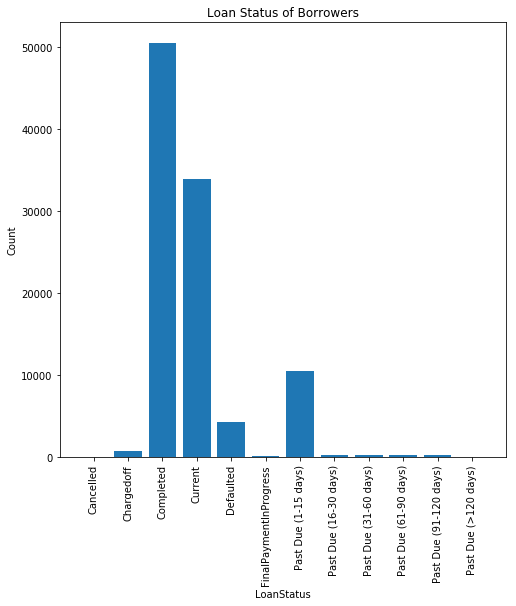

In [20]:
#returning the series with unique values for loan status
x = loan_data['LoanStatus'].unique()

#returning the series with the frequency count of each unique value
y = loan_data['LoanStatus'].value_counts(sort=True)

#plotting the bar chart in desired size
plt.figure(figsize= (8, 8))
plt.bar(x, y)

#labeling the axes
plt.xlabel('LoanStatus')
plt.ylabel('Count')
plt.title("Loan Status of Borrowers")

#using xticks to rotate the category labels counter-clockwise (not axes)
plt.xticks(rotation= 90)

#displaying the bar chart
plt.show()

In [21]:
loan_data['LoanStatus'].value_counts()

Current                   50466
Completed                 33894
Chargedoff                10463
Defaulted                  4249
Past Due (1-15 days)        709
Past Due (31-60 days)       320
Past Due (91-120 days)      277
Past Due (61-90 days)       274
Past Due (16-30 days)       241
FinalPaymentInProgress      185
Past Due (>120 days)         14
Cancelled                     2
Name: LoanStatus, dtype: int64

Observation: The most prevalent loan status is completion, followed by current, while about 10000 people's loans are past due between 1 and 15 days.

Question: What are the listing categories?

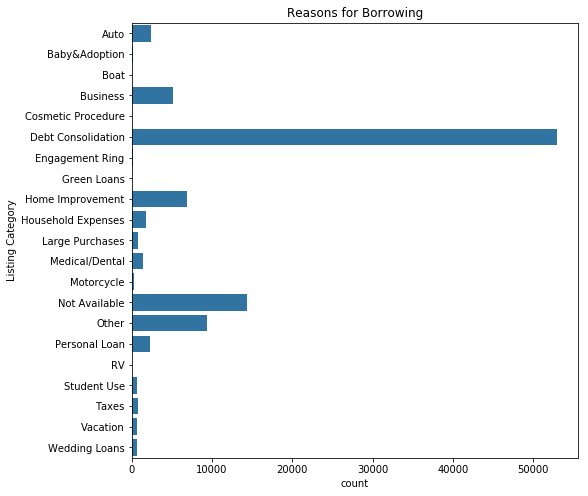

In [22]:
#plotting a horizontal bar chart for the listing categories
plt.figure(figsize= (8, 8))
sb.countplot(y= 'ListingCategory', data= loan_data, color= sb.color_palette()[0])
plt.ylabel('Listing Category')
plt.title("Reasons for Borrowing");

Observation: The highest reason for taking the loans is for loan consolidation.

Question: What is the distribution of loans in quarters?

In [23]:
loan_data['LoanOriginationQuarter'].value_counts()

Q4 2013    12498
Q1 2014    10315
Q3 2013     8640
Q2 2013     6642
Q3 2012     5091
Q2 2012     4490
Q2 2008     4058
Q4 2012     4043
Q1 2012     3855
Q4 2011     3405
Q1 2013     3288
Q3 2008     3139
Q2 2007     3098
Q1 2008     2982
Q1 2007     2974
Q3 2011     2742
Q3 2007     2582
Q4 2007     2491
Q4 2006     2238
Q2 2011     2202
Q1 2011     1575
Q3 2006     1437
Q4 2010     1419
Q2 2010     1345
Q4 2009     1292
Q3 2010     1127
Q1 2010     1101
Q3 2009      544
Q4 2008      465
Q2 2009       13
Q1 2006        2
Q2 2006        1
Name: LoanOriginationQuarter, dtype: int64

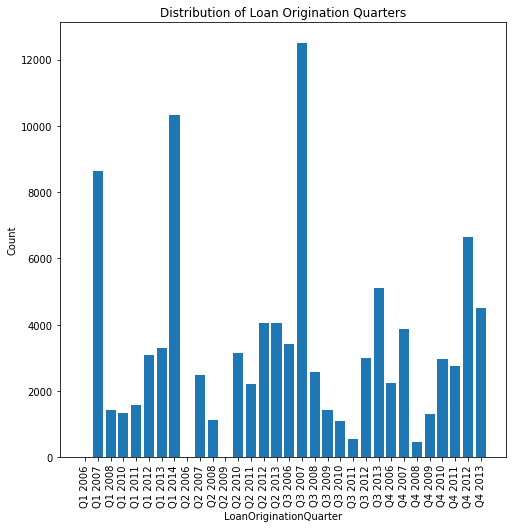

In [24]:
#returning the series with unique values for loan origination quarter
y = loan_data['LoanOriginationQuarter'].value_counts(sort= True)

#returning the series with frequency count of each unique value
x = loan_data['LoanOriginationQuarter'].unique()

#plotting the bar chart in the desired size
plt.figure(figsize= (8, 8))
plt.bar(x,y)

#labeling the axes
plt.xlabel('LoanOriginationQuarter')
plt.ylabel('Count')
plt.title("Distribution of Loan Origination Quarters")

#using xticks to rotate the category labels counter-clockwise (not axes)
plt.xticks(rotation= 90)

#displaying the barchart
plt.show()

Observation: Q3 2007 saw the highest loan collection

Question: What states have the most borrowers?

''

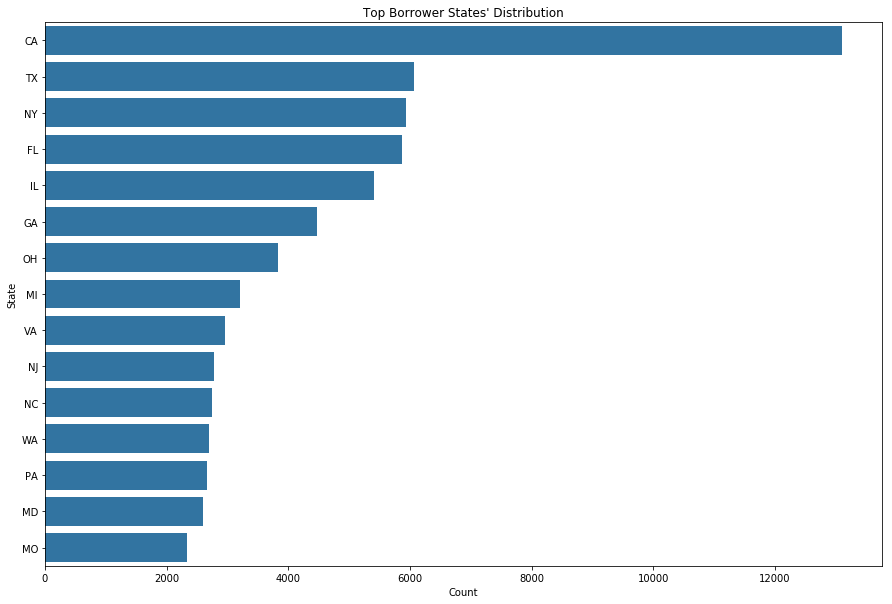

In [25]:
#plotting a horizontal bar chart for the top borrower states
plt.figure(figsize = [15, 10]) 
arrange = loan_data['BorrowerState'].value_counts().iloc[:15].index
sb.countplot(data= loan_data, y= 'BorrowerState', color = sb.color_palette()[0], order = arrange)
plt.title("Top Borrower States' Distribution")
plt.xlabel("Count")
plt.ylabel("State")
;

''

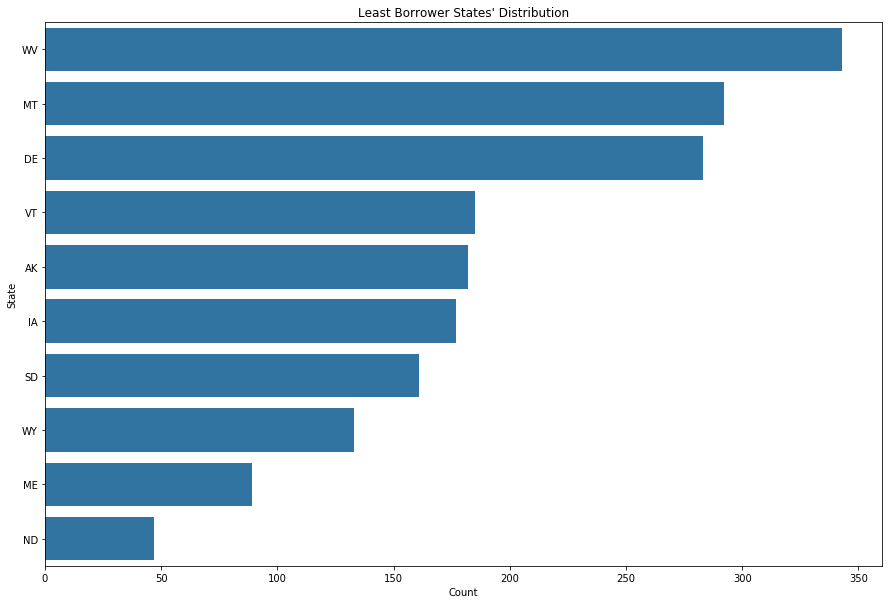

In [26]:
#plotting a horizontal bar chart for the least borrower states
plt.figure(figsize = [15, 10]) 
arrange = loan_data['BorrowerState'].value_counts().iloc[-10:].index
sb.countplot(data= loan_data, y= 'BorrowerState', color = sb.color_palette()[0], order = arrange)
plt.title("Least Borrower States' Distribution")
plt.xlabel("Count")
plt.ylabel("State")
;

Observation: California has the highest number of borrowers. Texas, New York, and Florida follow with about 6000 borrowers each. North Dakota has the least number of borrowers.

Question: What are the employment statuses of the borrowers?

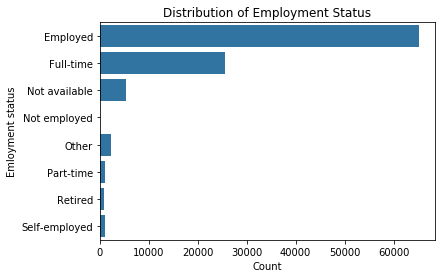

In [27]:
#plotting a horizontal bar chart for the employment statuses
sb.countplot(y= 'EmploymentStatus', data =loan_data, color= sb.color_palette()[0])
plt.title("Distribution of Employment Status")
plt.xlabel("Count")
plt.ylabel("Emloyment status");

Observation: Most of the borrowers are employed and working full-time.

Question: What is the distribution of the loan terms?

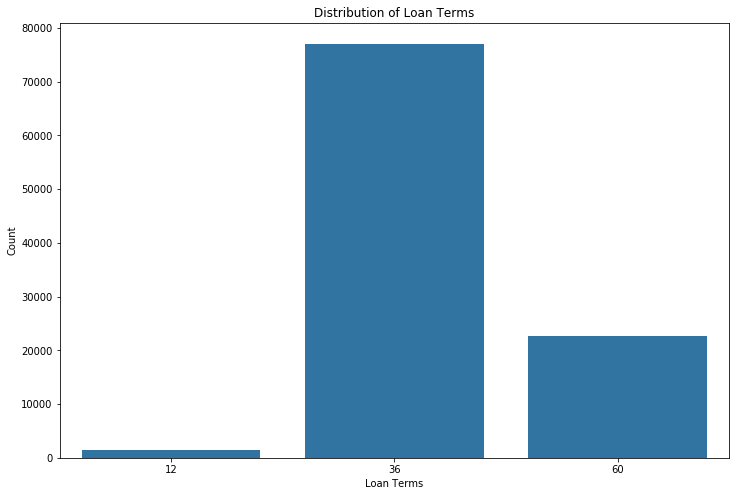

In [28]:
#plotting a bar chart showing the loan terms
plt.figure(figsize = [12, 8])
arrangement = [12, 36, 60]
sb.countplot(data= loan_data, x= 'Term', color = sb.color_palette()[0], order = arrangement)
plt.title("Distribution of Loan Terms")
plt.xlabel("Loan Terms")
plt.ylabel("Count");

Observation: Most of the loans have a 36-month term.

Question: What is the distribution for the borrowers' monthly income?

In [29]:
loan_data['StatedMonthlyIncome'].describe()

count    101094.000000
mean       5683.137009
std        4979.282324
min           0.000000
25%        3333.333333
50%        4800.000000
75%        6916.666667
max      483333.333333
Name: StatedMonthlyIncome, dtype: float64

In [30]:
loan_data['StatedMonthlyIncome'].max()+600

483933.33333300002

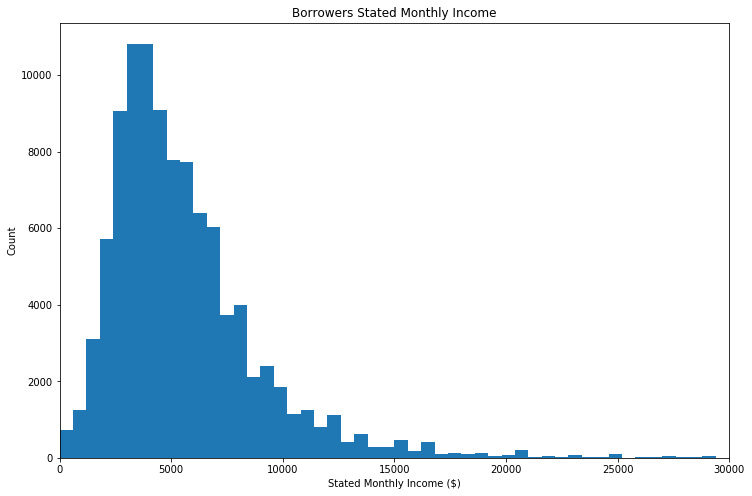

In [31]:
#plotting a histogram showing borrowers' 'StatedMonthlyIncome'
plt.figure(figsize = [12, 8])
binsize= np.arange(0, 1750603, 600)
plt.hist(data= loan_data, x = 'StatedMonthlyIncome', bins= binsize)
plt.ylabel('Count')
plt.xlabel('Stated Monthly Income ($)')
plt.title('Borrowers Stated Monthly Income')
plt.xlim(0, 30000);

Observation: More than 10000 people in the dataset earn about 5000 monthly.

Question: What are the borrowers' debt to income ratio?

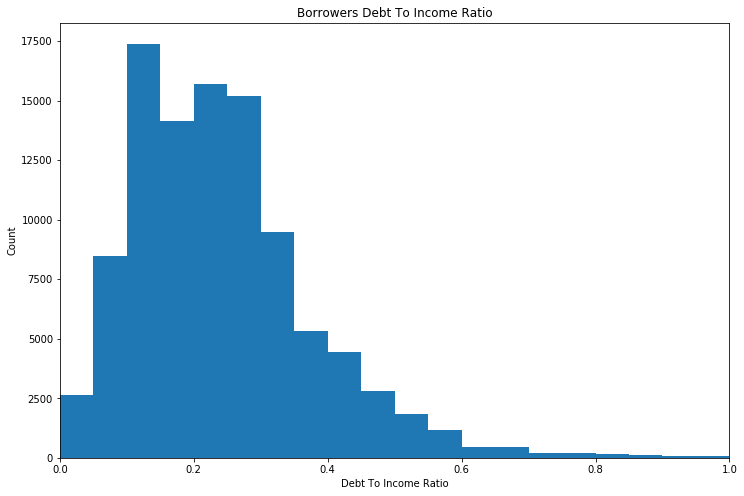

In [32]:
#plotting a histogram for the borrowers' 'DebtToIncomeRatio'
plt.figure(figsize = [12, 8])
binsize= np.arange(0, loan_data['DebtToIncomeRatio'].max()+0.05, 0.05)
plt.hist(data= loan_data, x = 'DebtToIncomeRatio', bins= binsize)
plt.xlim(0, 1)
plt.xlabel("Debt To Income Ratio")
plt.ylabel('Count')
plt.title('Borrowers Debt To Income Ratio');

Observation: The lowest debt to income ratio ranges from 0 to 0.2

Question: What is the distribution of original loan amounts?

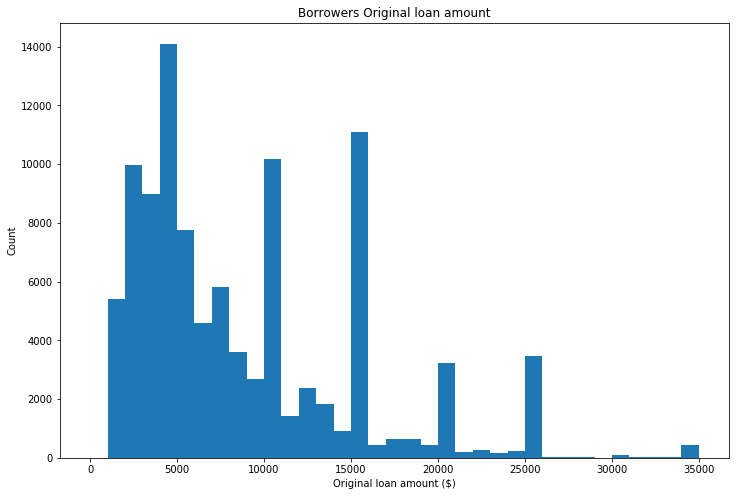

In [33]:
#plotting a histogram for original loan amounts
plt.figure(figsize = [12, 8])
binsize= np.arange(0, loan_data['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data= loan_data, x = 'LoanOriginalAmount', bins= binsize)
plt.xlabel("Original loan amount ($)")
plt.ylabel('Count')
plt.title('Borrowers Original loan amount');

Observation: About 14000 people took loans of $5000

Question: What are the borrower rates?

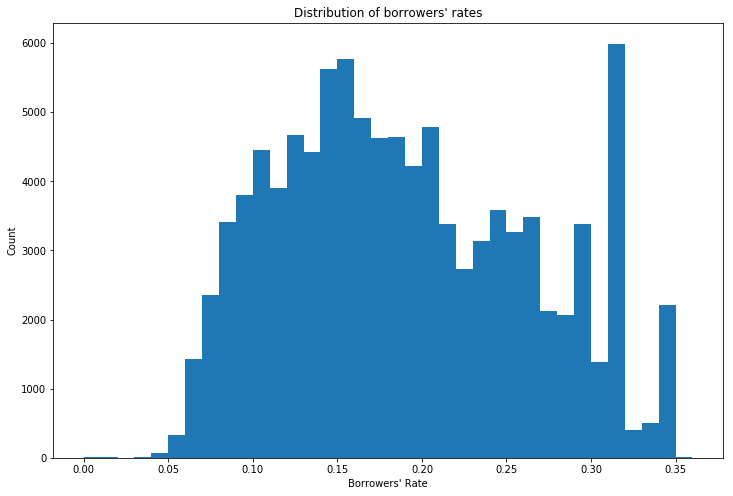

In [34]:
#plotting a histogram for the Borrowers' Rate
plt.figure(figsize = [12, 8])
binsize= np.arange(0, loan_data['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data= loan_data, x = 'BorrowerRate', bins= binsize)
plt.xlabel("Borrowers' Rate")
plt.ylabel('Count')
plt.title("Distribution of borrowers' rates");

Observation: The highest borrower rate is between 0.30 and 0.35

Question: What are the various occupations?

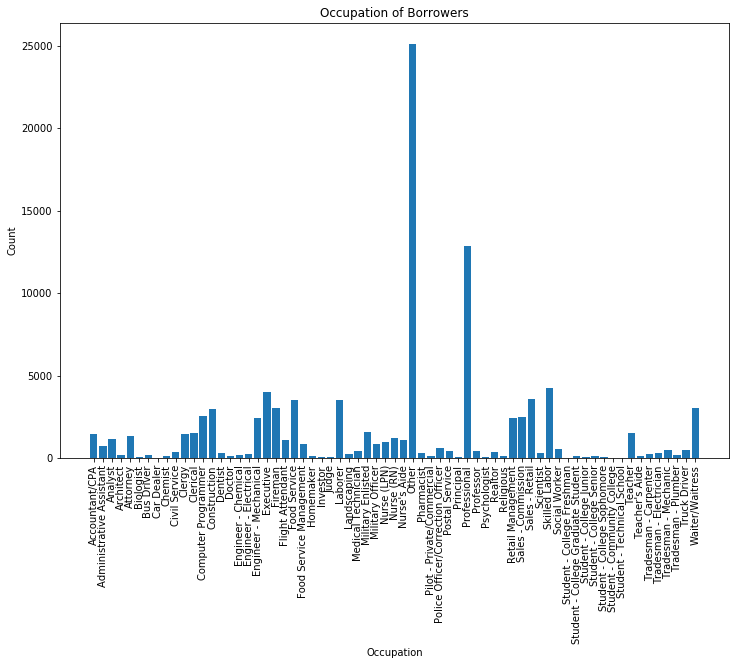

In [35]:
#returning the series with unique values for occupation
x = loan_data['Occupation'].unique()

#returning the series with the frequency count of each unique value
y = loan_data['Occupation'].value_counts(sort=True)

#plotting the bar chart in desired size
plt.figure(figsize=(12, 8))
plt.bar(x, y)

#labeling the axes
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title("Occupation of Borrowers")

#using xticks to rotate the category labels counter-clockwise (not axes)
plt.xticks(rotation= 90)

#displaying the bar chart
plt.show()

People in the 'other' category for borrowers' occupation have the highest number.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distributions for both Monthly income and debt to income ratio are right skewed. The most prevalent loan status is completion, followed by current, while about 10000 people's loans are past due between 1 and 15 days. Q3 2007 saw the highest loan collection. California has the highest number of borrowers. Texas, New York, and Florida follow with about 6000 borrowers each. North Dakota has the least number of borrowers. Most of the loans have a 36-month term. More than 10000 people in the dataset earn about 5000 monthly. About 14000 people took loans of $5000. People in the 'other' category for borrowers' occupation have the highest number. The lowest debt to income ratio ranges from 0 to 0.2, and the highest borrower rate is between 0.30 and 0.35 

## Bivariate Exploration

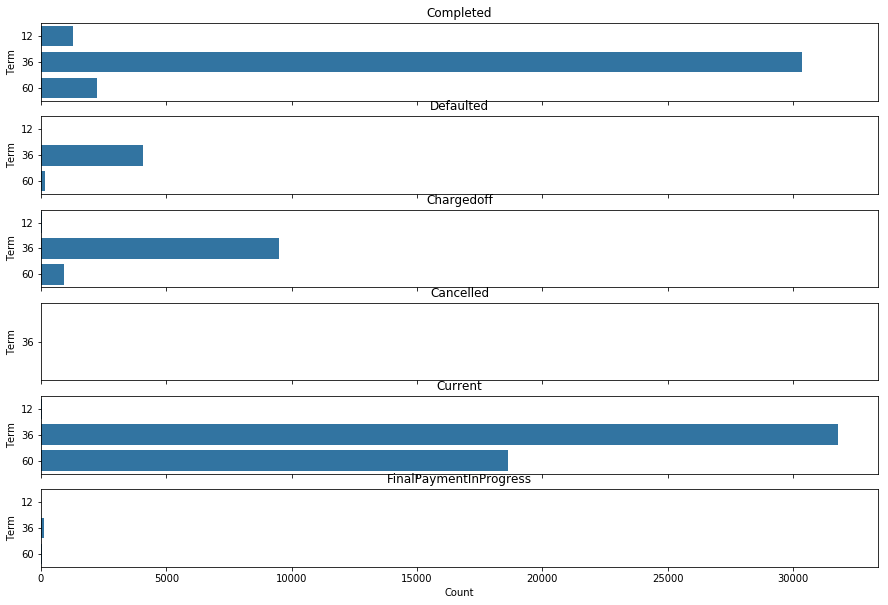

In [36]:
#plotting a horizontal bar chart for terms of different loan statuses
fig, ax= plt.subplots(nrows= 6, figsize= (15,10), sharex = True)

sb.countplot(data= loan_data.query('LoanStatus=="Completed"'), y='Term', ax=ax[0], color = sb.color_palette()[0])
ax[0].set_title('Completed')
ax[0].set_xlabel('')

sb.countplot(data= loan_data.query('LoanStatus=="Defaulted"'), y='Term', ax=ax[1], color = sb.color_palette()[0])
ax[1].set_title('Defaulted')
ax[1].set_xlabel('')

sb.countplot(data= loan_data.query('LoanStatus=="Chargedoff"'), y='Term', ax=ax[2], color = sb.color_palette()[0])
ax[2].set_title('Chargedoff')
ax[2].set_xlabel('')

sb.countplot(data= loan_data.query('LoanStatus=="Cancelled"'), y='Term', ax=ax[3], color = sb.color_palette()[0])
ax[3].set_title('Cancelled')
ax[3].set_xlabel('')

sb.countplot(data= loan_data.query('LoanStatus=="Current"'), y='Term', ax=ax[4], color = sb.color_palette()[0])
ax[4].set_title('Current')
ax[4].set_xlabel('')

sb.countplot(data= loan_data.query('LoanStatus=="FinalPaymentInProgress"'), y='Term', ax=ax[5], color = sb.color_palette()[0])
ax[5].set_title('FinalPaymentInProgress')
ax[5].set_xlabel('Count')

plt.show();

Observation: Having known that the highest percentage of loans are 36-term loans, 'current' 36-term loans have the highest category for loan status.

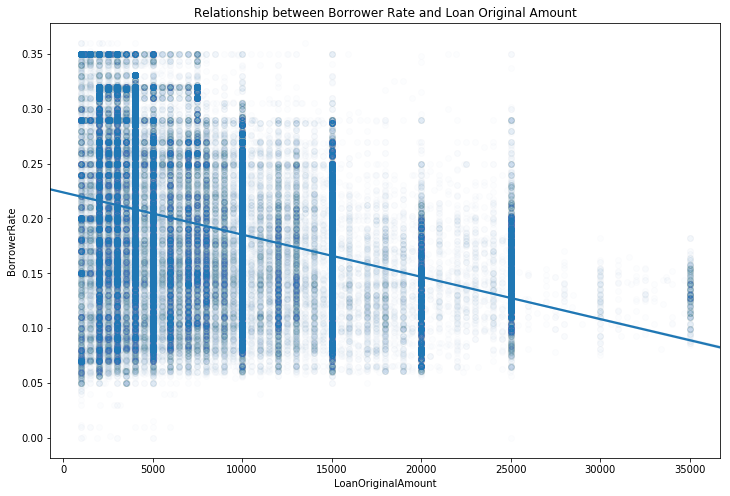

In [37]:
#checking the relationship between borrower rate and loan original amount
plt.figure(figsize = [12, 8])
sb.regplot(data = loan_data, x = 'LoanOriginalAmount', y = 'BorrowerRate', scatter_kws= {'alpha':0.01})
plt.title('Relationship between Borrower Rate and Loan Original Amount');

Observation: The higher the loan original amount, the lower the borrower rate.

In [38]:
#getting another dataframe for the borrower states and their loan statuses
states = pd.DataFrame(loan_data.groupby('BorrowerState')['LoanStatus'].value_counts(),
                      columns= ['LoanStatus'])
states.rename(columns= {'LoanStatus': 'Count'}, inplace= True)
states.reset_index(inplace= True)
states.head()

BorrowerState              LoanStatus  Count
0            AK                 Current     94
1            AK               Completed     68
2            AK              Chargedoff     14
3            AK               Defaulted      3
4            AK  FinalPaymentInProgress      2

In [39]:
#filtering out the top 4 borrower states
filter_states = states.query("BorrowerState == 'CA' or BorrowerState == 'TX' or BorrowerState== 'NY' or BorrowerState== 'FL'")

In [40]:
filter_states.columns

Index(['BorrowerState', 'LoanStatus', 'Count'], dtype='object')

Text(0.5,0,'Count')

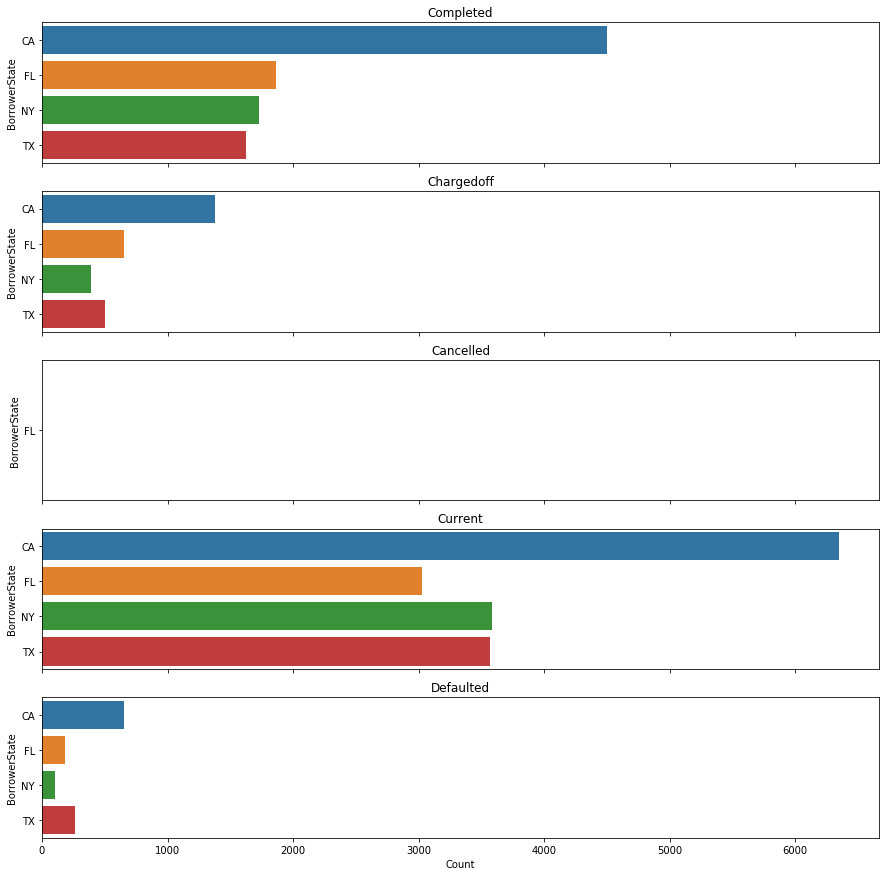

In [41]:
#plotting bar charts for the different loan statuses in the top borrower states
fig, ax= plt.subplots(nrows=5, figsize = [15,15], sharex = True)

sb.barplot(data= filter_states.query('LoanStatus=="Completed"'), y= 'BorrowerState', x= 'Count', ax=ax[0])
ax[0].set_title('Completed')
ax[0].set_xlabel('')

sb.barplot(data= filter_states.query('LoanStatus=="Chargedoff"'), y= 'BorrowerState', x= 'Count', ax=ax[1])
ax[1].set_title('Chargedoff')
ax[1].set_xlabel('')

sb.barplot(data= filter_states.query('LoanStatus=="Cancelled"'), y= 'BorrowerState', x= 'Count', ax=ax[2])
ax[2].set_title('Cancelled')
ax[2].set_xlabel('')

sb.barplot(data= filter_states.query('LoanStatus=="Current"'), y= 'BorrowerState', x= 'Count', ax=ax[3])
ax[3].set_title('Current')
ax[3].set_xlabel('')

sb.barplot(data= filter_states.query('LoanStatus=="Defaulted"'), y= 'BorrowerState', x= 'Count', ax=ax[4])
ax[4].set_title('Defaulted')
ax[4].set_xlabel('Count')

Observation: The highest loan status in California is 'current'.

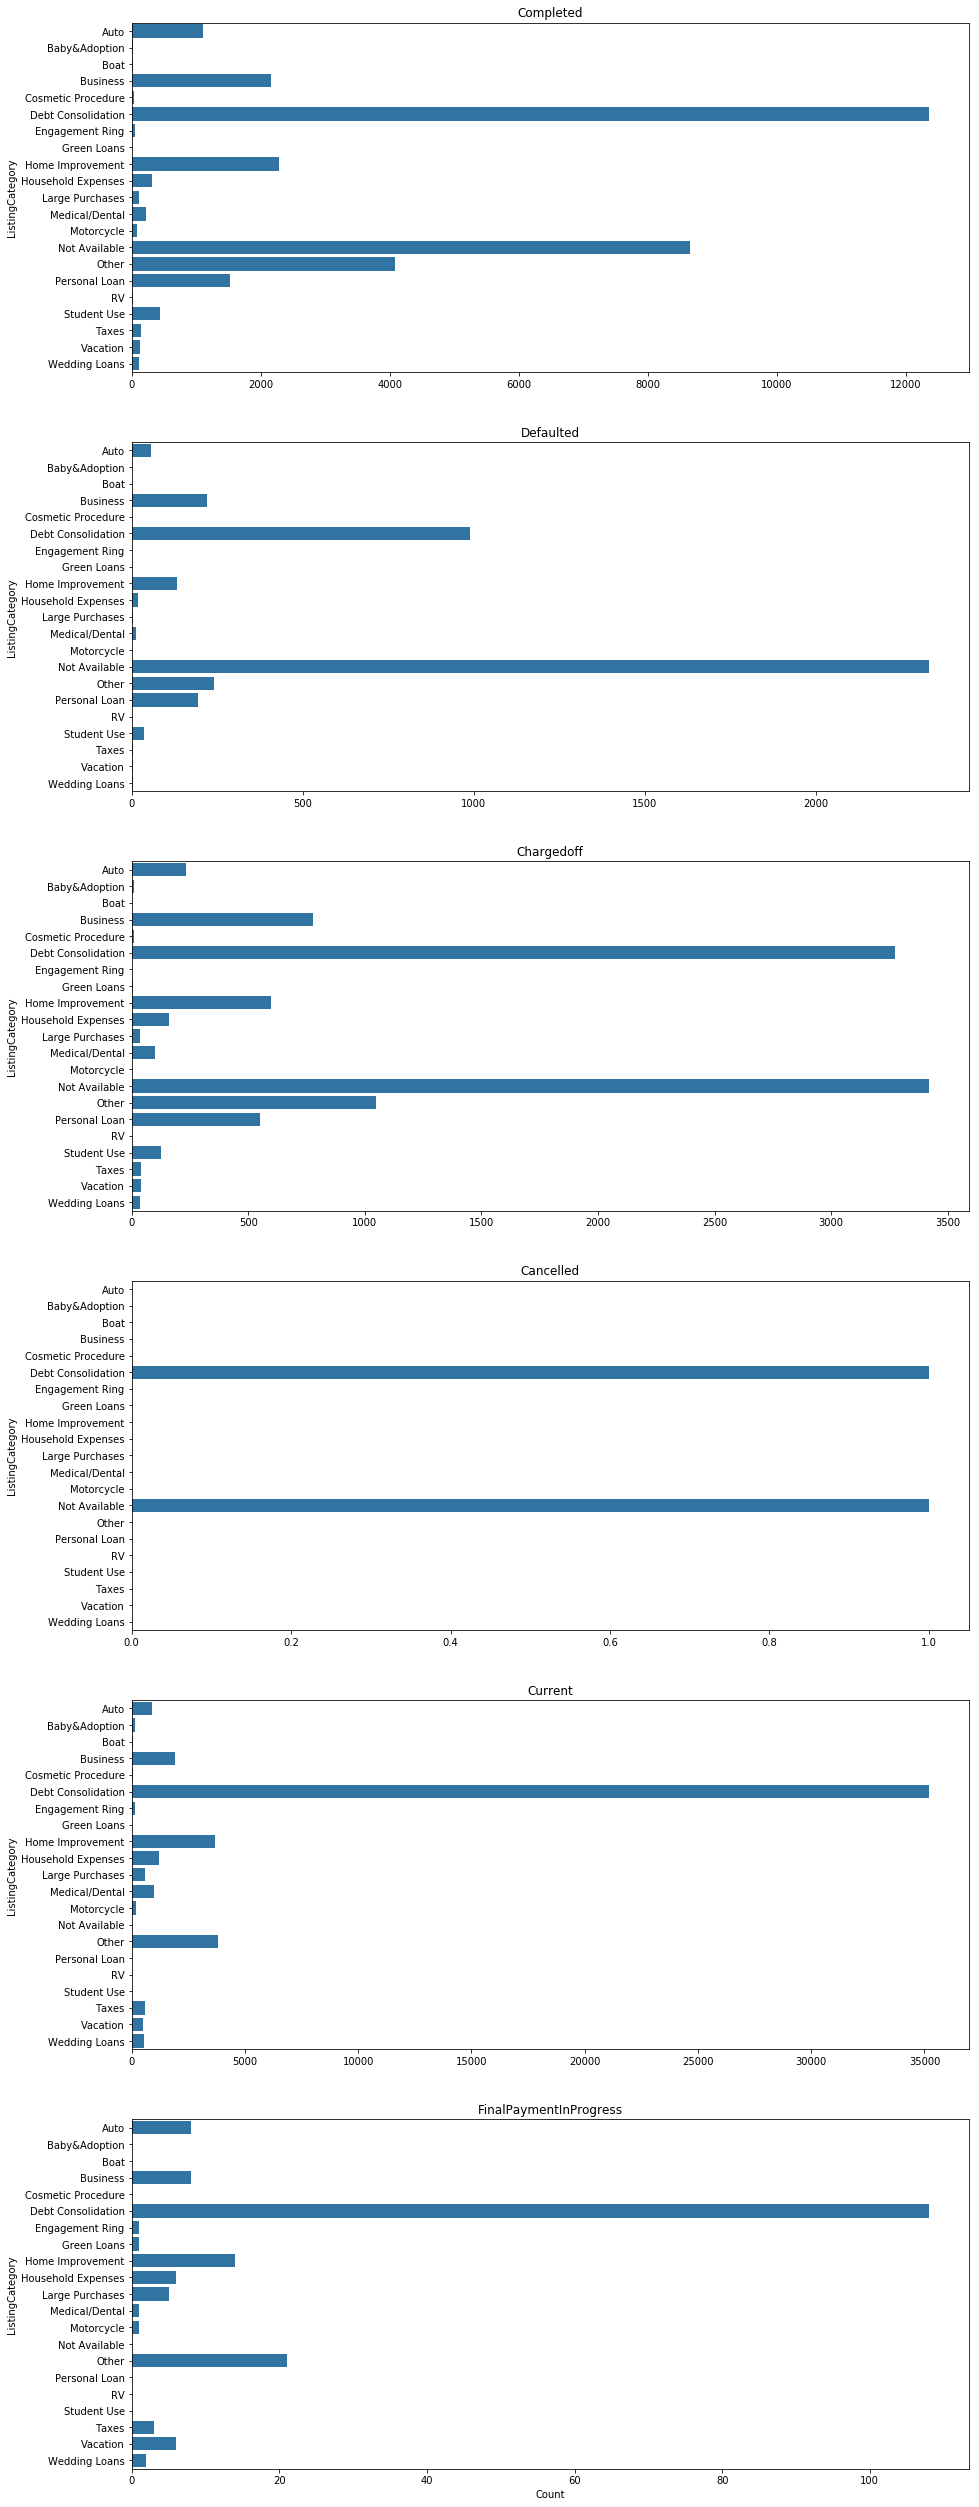

In [42]:
fig, ax= plt.subplots(nrows= 6, figsize= (15,45), sharex= False)

sb.countplot(data= loan_data.query('LoanStatus=="Completed"'), y='ListingCategory', ax=ax[0], color = sb.color_palette()[0])
ax[0].set_title('Completed')
ax[0].set_xlabel('')

sb.countplot(data= loan_data.query('LoanStatus=="Defaulted"'), y='ListingCategory', ax=ax[1], color = sb.color_palette()[0])
ax[1].set_title('Defaulted')
ax[1].set_xlabel('')

sb.countplot(data= loan_data.query('LoanStatus=="Chargedoff"'), y='ListingCategory', ax=ax[2], color = sb.color_palette()[0])
ax[2].set_title('Chargedoff')
ax[2].set_xlabel('')

sb.countplot(data= loan_data.query('LoanStatus=="Cancelled"'), y='ListingCategory', ax=ax[3], color = sb.color_palette()[0])
ax[3].set_title('Cancelled')
ax[3].set_xlabel('')

sb.countplot(data= loan_data.query('LoanStatus=="Current"'), y='ListingCategory', ax=ax[4], color = sb.color_palette()[0])
ax[4].set_title('Current')
ax[4].set_xlabel('')

sb.countplot(data= loan_data.query('LoanStatus=="FinalPaymentInProgress"'), y='ListingCategory', ax=ax[5],
             color = sb.color_palette()[0])
ax[5].set_title('FinalPaymentInProgress')
ax[5].set_xlabel('Count')

plt.show();

Observation: The highest loan status for debt consolidation is 'current'.

In [43]:
numeric_variables= [ 'LoanOriginalAmount', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'BorrowerRate']

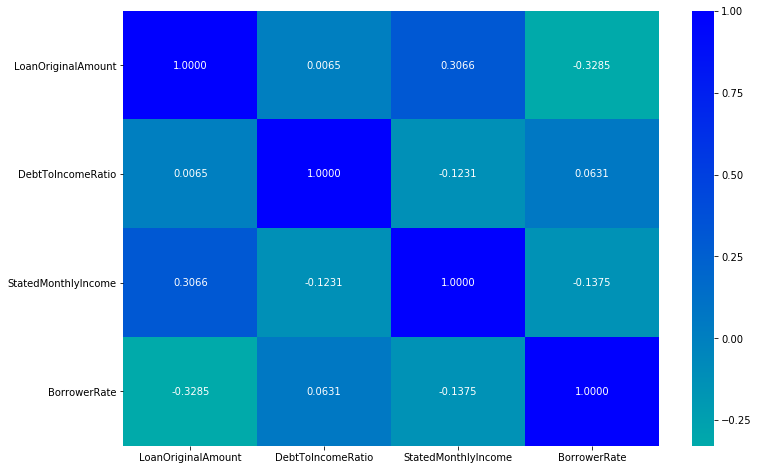

In [44]:
#getting the correlation between numeric variables
plt.figure(figsize= [12, 8])
sb.heatmap(loan_data[numeric_variables].corr(), annot= True, fmt= '.4f',
           cmap= 'winter_r', center= 0);

Observation: The correlation between Loan Original Amount and Debt to Income Ratio is 0.0065, 
             The correlation between Loan Original Amount and Stated Monthly Income is 0.3066, and
             The correlation between Loan Original Amount and Borrower Rate is -0.3285

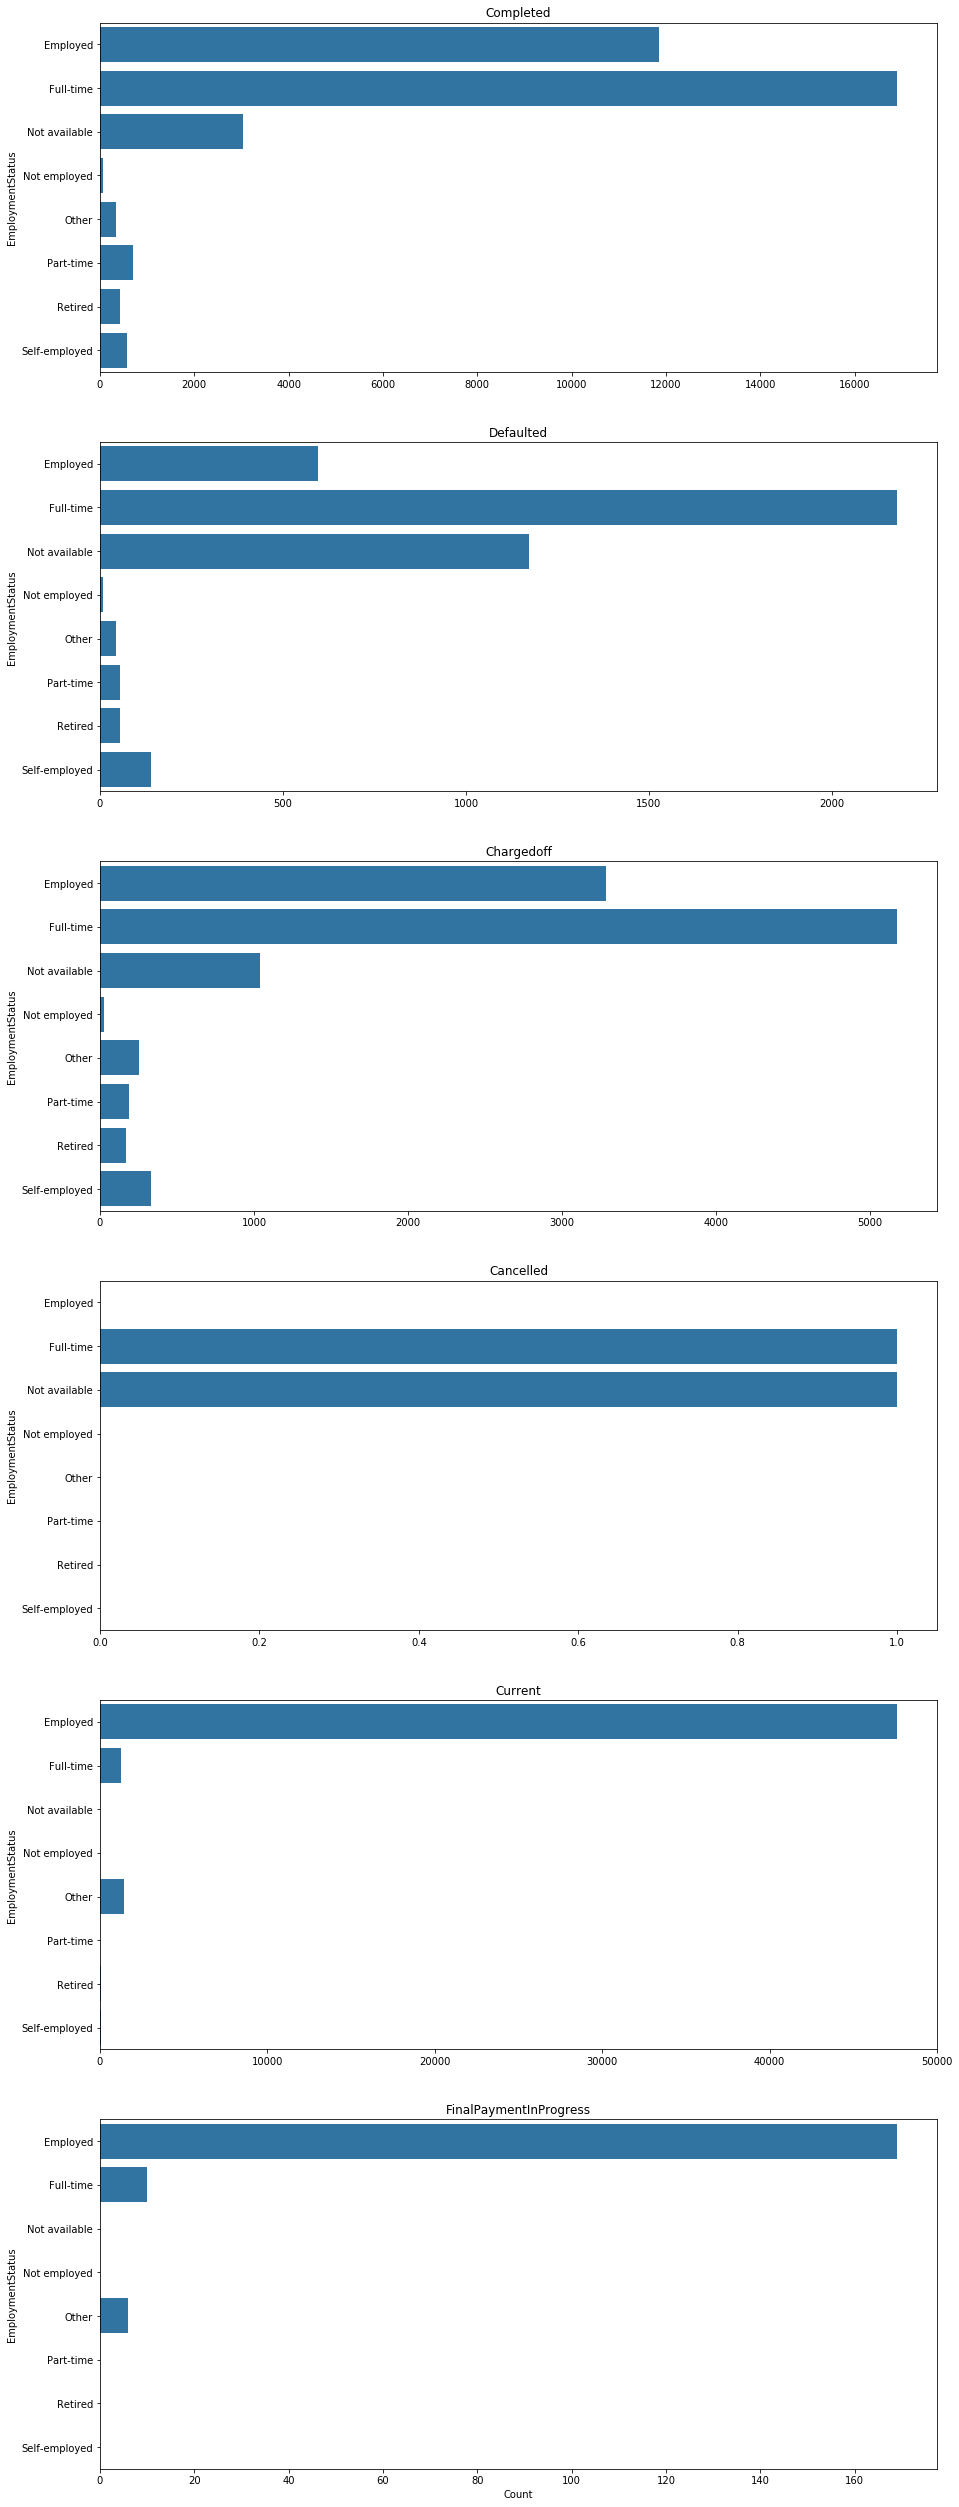

In [45]:
#plotting bar charts for the employments statuses in different loan statuses
fig, ax= plt.subplots(nrows= 6, figsize= (15,45), sharex= False)

sb.countplot(data= loan_data.query('LoanStatus=="Completed"'), y='EmploymentStatus', ax=ax[0], color = sb.color_palette()[0])
ax[0].set_title('Completed')
ax[0].set_xlabel('')

sb.countplot(data= loan_data.query('LoanStatus=="Defaulted"'), y='EmploymentStatus', ax=ax[1], color = sb.color_palette()[0])
ax[1].set_title('Defaulted')
ax[1].set_xlabel('')

sb.countplot(data= loan_data.query('LoanStatus=="Chargedoff"'), y='EmploymentStatus', ax=ax[2], color = sb.color_palette()[0])
ax[2].set_title('Chargedoff')
ax[2].set_xlabel('')

sb.countplot(data= loan_data.query('LoanStatus=="Cancelled"'), y='EmploymentStatus', ax=ax[3], color = sb.color_palette()[0])
ax[3].set_title('Cancelled')
ax[3].set_xlabel('')

sb.countplot(data= loan_data.query('LoanStatus=="Current"'), y='EmploymentStatus', ax=ax[4], color = sb.color_palette()[0])
ax[4].set_title('Current')
ax[4].set_xlabel('')

sb.countplot(data= loan_data.query('LoanStatus=="FinalPaymentInProgress"'), y='EmploymentStatus', ax=ax[5],
             color = sb.color_palette()[0])
ax[5].set_title('FinalPaymentInProgress')
ax[5].set_xlabel('Count')

plt.show();

Observation: Most loans taken by people doing full-time work are completed.

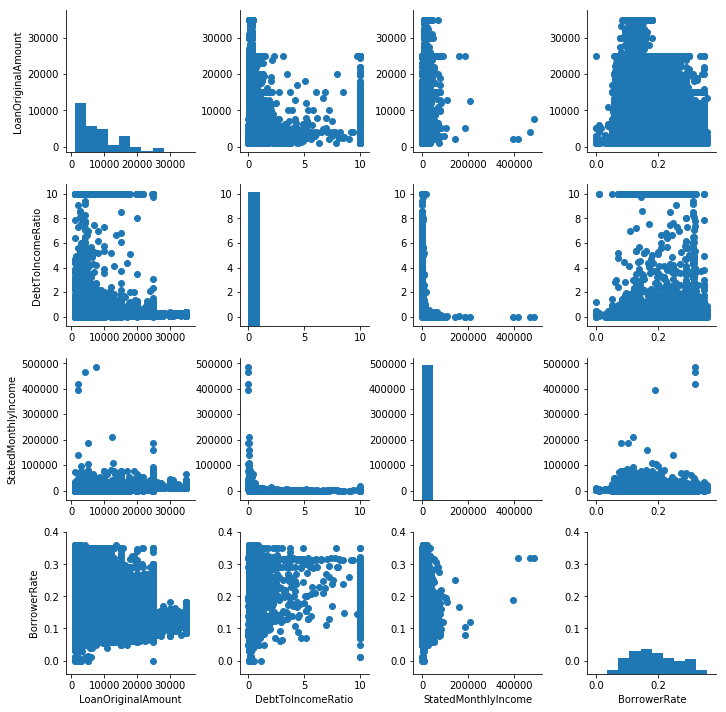

In [46]:
g= sb.PairGrid(data= loan_data, vars= numeric_variables)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

Observation: There is a negative correlation between borrower rate and loan amount while there is a positive correlation between loan original amount and the stated monthly income.


Question

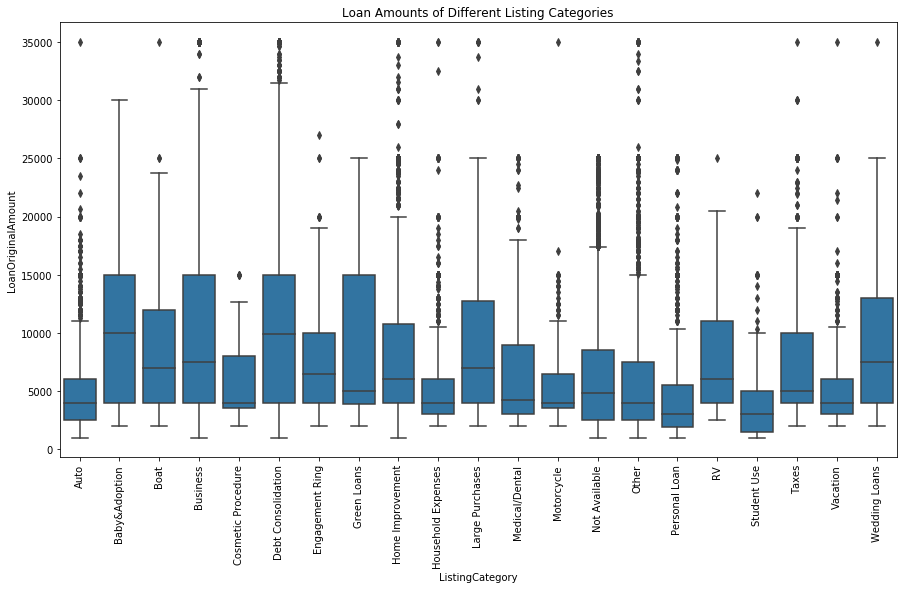

In [47]:
#boxplot for loan amounts of different listing categories
plt.figure(figsize = [15, 8])
sb.boxplot(data = loan_data, x = 'ListingCategory', y = 'LoanOriginalAmount', color = sb.color_palette()[0]);
plt.xticks(rotation = 90)
plt.title('Loan Amounts of Different Listing Categories');

Observation: Green loans, debt consolidation, business, and baby & adoption had the highest loan amounts.

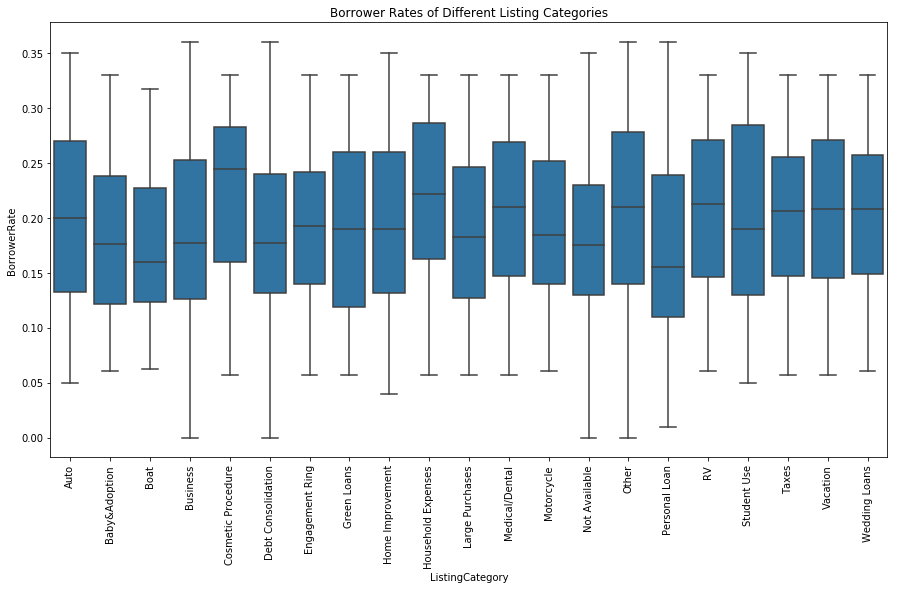

In [48]:
#boxplot for borrower rates of different listing categories
plt.figure(figsize = [15, 8])
sb.boxplot(data = loan_data, x = 'ListingCategory', y = 'BorrowerRate', color = sb.color_palette()[0]);
plt.xticks(rotation = 90)
plt.title('Borrower Rates of Different Listing Categories');

Observation: cosmetic procedure, household expenses, other, and student use had the highest borrower rates

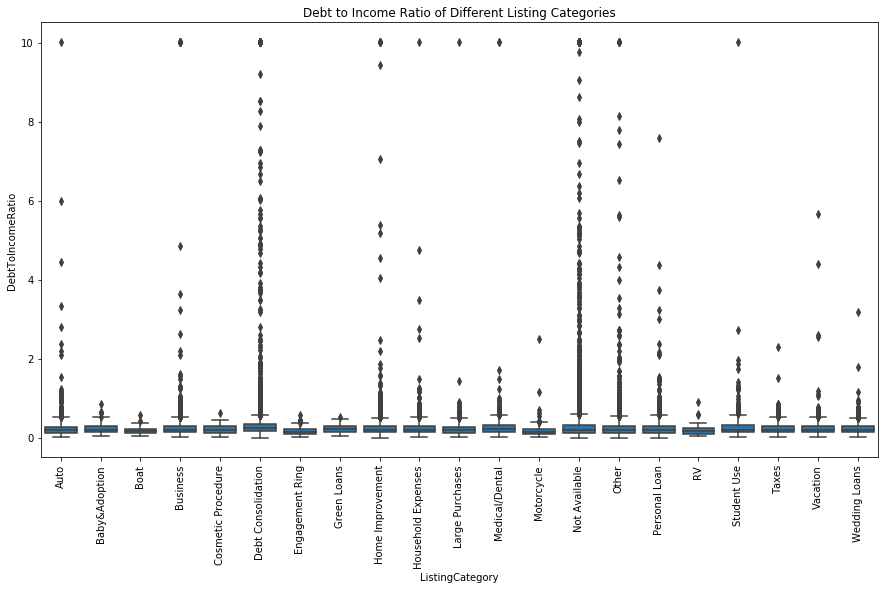

In [49]:
#boxplot for debt to income ratio of different listing categories
plt.figure(figsize = [15, 8])
sb.boxplot(data = loan_data, x = 'ListingCategory', y = 'DebtToIncomeRatio', color = sb.color_palette()[0]);
plt.xticks(rotation = 90)
plt.title('Debt to Income Ratio of Different Listing Categories');

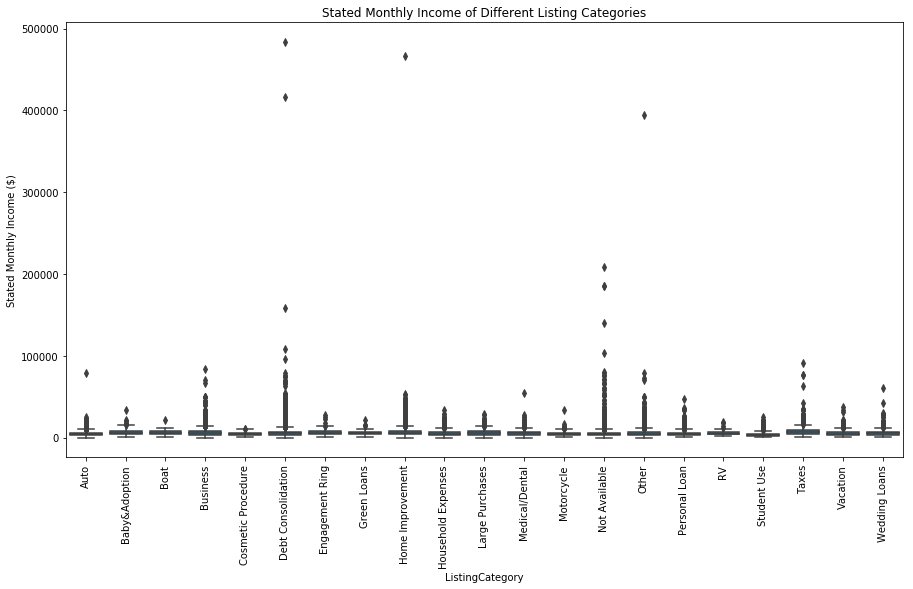

In [50]:
#boxplot for stated monthly income of different listing categories
plt.figure(figsize = [15, 8])
sb.boxplot(data = loan_data, x = 'ListingCategory', y = 'StatedMonthlyIncome', color = sb.color_palette()[0]);
plt.xticks(rotation = 90)
plt.ylabel('Stated Monthly Income ($)')
plt.title('Stated Monthly Income of Different Listing Categories');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There is a negative correlation between borrower rate and loan amount while there is a positive correlation between loan original amount and the stated monthly income. The higher the loan original amount, the lower the borrower rate. Green loans, debt consolidation, business, and baby & adoption had the highest loan amounts.  Most loans taken by people doing full-time work are completed. The highest loan status for debt consolidation is 'current'. The highest loan status in California is 'current'. 'Current' 36-term loans have the highest category for loan status.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Cosmetic procedure, household expenses, other, and student use had the highest borrower rates. 

## Multivariate Exploration

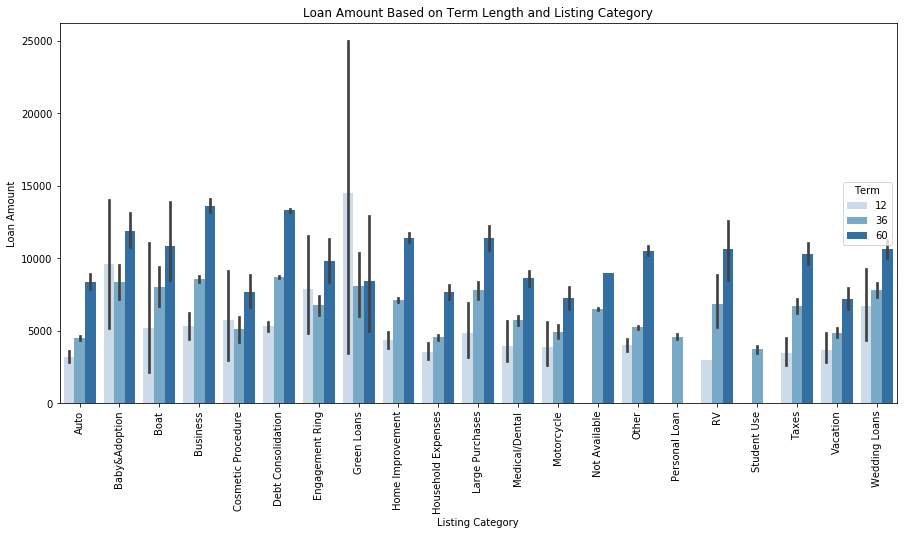

In [51]:
#bar plot for Loan Amount Based on Term Length and Listing Category
fig = plt.figure(figsize = [15,7])
ax = sb.barplot(data = loan_data, x = 'ListingCategory', y = 'LoanOriginalAmount',  hue = 'Term', palette = 'Blues')
plt.title('Loan Amount Based on Term Length and Listing Category')
plt.xlabel('Listing Category')
plt.ylabel('Loan Amount')
plt.xticks(rotation = 90)
ax.legend(loc='center right', title='Term')
plt.show();

Observation: The highest green loan amount is a 12-term loan.

Question

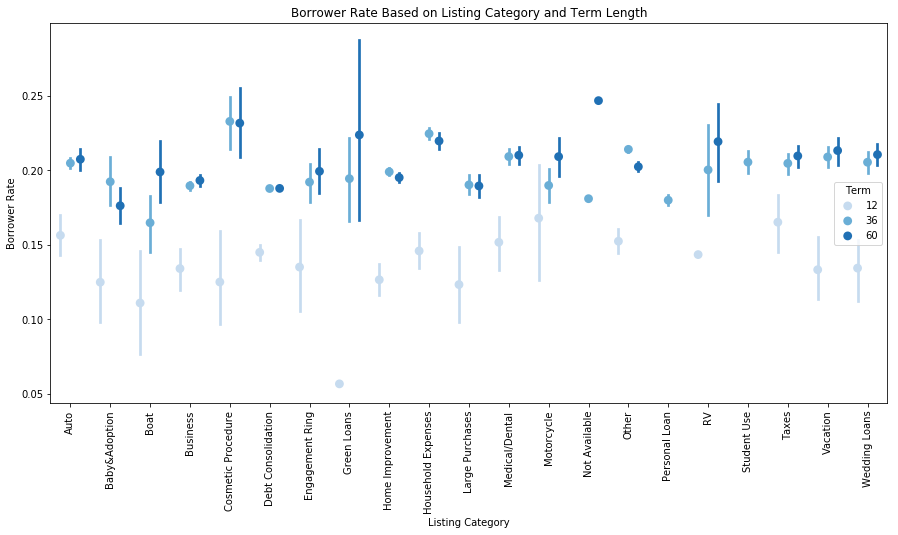

In [52]:
#bar plot for Borrower Rate Based on Listing Category and Term Length
fig = plt.figure(figsize = [15,7])
ax = sb.pointplot(data = loan_data, x = 'ListingCategory', y = 'BorrowerRate',  hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.5)
plt.title('Borrower Rate Based on Listing Category and Term Length')
plt.xlabel('Listing Category')
plt.ylabel('Borrower Rate')
plt.xticks(rotation = 90)
ax.legend(loc='center right', title='Term')
plt.show();

Observation: Shorter term loans have lower borrower rates.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

One of the multivariate visualizations corroborates the fact that green loans have the highest loan amount. The highest green loan amount is a 12-term loan.

### Were there any interesting or surprising interactions between features?

Shorter term loans have lower borrower rates.

## Conclusions
I explored loan original amounts and loan statuses in relation to some other features in the dataset. The distributions for both Monthly income and debt to income ratio are right skewed. The most prevalent loan status is completion, followed by current, while about 10000 people's loans are past due between 1 and 15 days. Q3 2007 saw the highest loan collection. California has the highest number of borrowers. Texas, New York, and Florida follow with about 6000 borrowers each. North Dakota has the least number of borrowers. Most of the loans have a 36-month term. About 5000 people in the dataset earn more than 10000 monthly. Highest loan amounts are about 14000. People in the 'other' category for borrowers' occupation have the highest number. The lowest debt to income ratio ranges from 0 to 0.2, and the highest borrower rate is between 0.30 and 0.35

There is a negative correlation between borrower rate and loan amount while there is a positive correlation between loan original amount and the stated monthly income. The higher the loan original amount, the lower the borrower rate. Green loans, debt consolidation, business, and baby & adoption had the highest loan amounts. Most loans taken by people doing full-time work are completed. The highest loan status for debt consolidation is 'current'. The highest loan status in California is 'current'. 'Current' 36-term loans have the highest category for loan status. Green loans have the highest loan amount. The highest green loan amount is a 12-term loan.

References:
Stackoverflow, Udacity Classroom
